<a href="https://colab.research.google.com/github/Ballardmallard/PQHS416_Spring_25/blob/main/Homework_7_Stockdale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# HW 7 Graham Stockdale
# importing


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


Training samples: 8982
Test samples: 2246
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5617 - loss: 2.2095 - val_accuracy: 0.7740 - val_loss: 1.0164
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8368 - loss: 0.7344 - val_accuracy: 0.8250 - val_loss: 0.8264
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9225 - loss: 0.3481 - val_accuracy: 0.8160 - val_loss: 0.8539
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9551 - loss: 0.2132 - val_accuracy: 0.8130 - val_loss: 0.9347
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - a

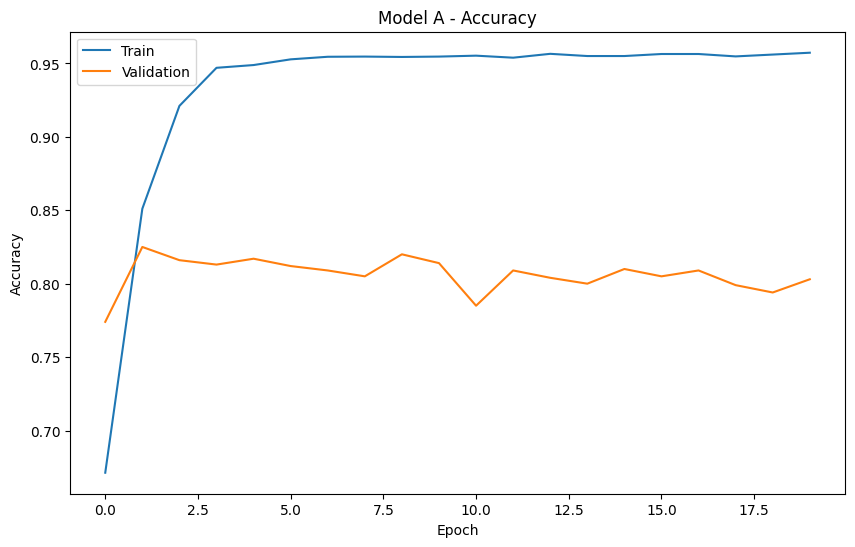

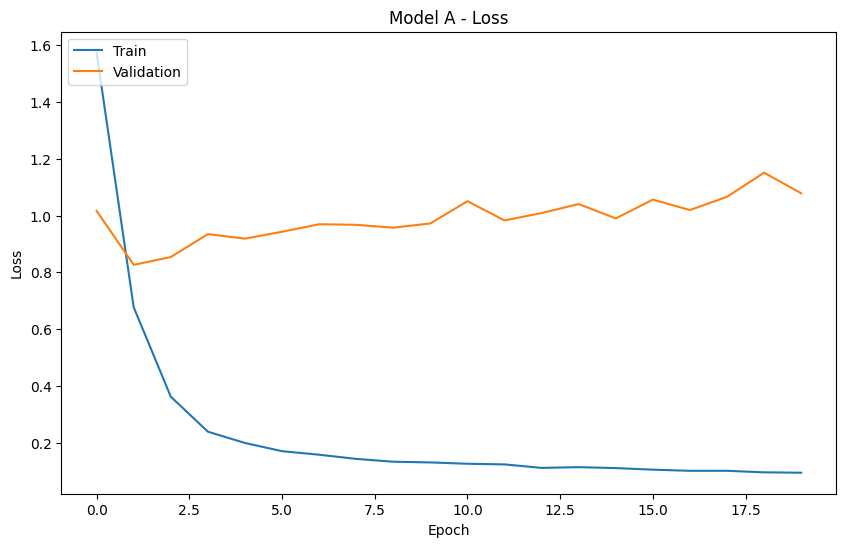

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8178 - loss: 1.0057
Model A - Validation accuracy: 0.8030


In [7]:
# reimplementing homework from class

# loading the Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# check dataset sizes
print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")

# seeing what it's like
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

# vectorizing data
import numpy as np

# encoding the input data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# vectorizing training and test data
x_train = vectorize_sequences(train_data)  # Vectorized training data
x_test = vectorize_sequences(test_data)    # Vectorized test data

# encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# create validation split
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# import the needed libraries
from tensorflow import keras
from tensorflow.keras import layers

# model A: 2 Dense layers (64, 64), Activation: ReLU
model_a = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model_a.compile(optimizer="adam",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

history_a = model_a.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# plotting the results
import matplotlib.pyplot as plt

# plotting training & validation accuracy for Model A
plt.figure(figsize=(10, 6))
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('Model A - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plotting training & validation loss for Model A
plt.figure(figsize=(10, 6))
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model A - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# evaluating model A on validation data
val_loss_a, val_acc_a = model_a.evaluate(x_val, y_val)
print(f"Model A - Validation accuracy: {val_acc_a:.4f}")

In [8]:
# evaluate model A on validation data
results_a = model_a.evaluate(x_val, y_val)
print(f"Model A - Validation accuracy: {results_a[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8178 - loss: 1.0057
Model A - Validation accuracy: 0.8030


In [9]:
# model B
model_b = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_b.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_b = model_b.fit(partial_x_train,
                      partial_y_train,
                      epochs=50,
                      batch_size=64,
                      validation_data=(x_val, y_val))

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5267 - loss: 2.3970 - val_accuracy: 0.7620 - val_loss: 1.0954
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8263 - loss: 0.7980 - val_accuracy: 0.8020 - val_loss: 0.8985
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9183 - loss: 0.3972 - val_accuracy: 0.8240 - val_loss: 0.8336
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9480 - loss: 0.2294 - val_accuracy: 0.8210 - val_loss: 0.8832
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9574 - loss: 0.1755 - val_accuracy: 0.8020 - val_loss: 0.9343
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9579 - loss: 0.1524 - val_accuracy: 0.8060 - val_loss: 0.9263
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9609 - loss: 0.1360 - val_accuracy: 0.8180 - val_loss: 0.9366
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9605 - loss: 0.1248 - val_accu

In [10]:
# evaluate model B
results_b = model_b.evaluate(x_val, y_val)
print(f"Model B - Validation accuracy: {results_b[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 1.3908
Model B - Validation accuracy: 0.7970


In [11]:
# model C
model_c = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_c.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_c = model_c.fit(partial_x_train,
                      partial_y_train,
                      epochs=50,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4966 - loss: 2.5870 - val_accuracy: 0.7530 - val_loss: 1.1436
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8032 - loss: 0.8791 - val_accuracy: 0.8140 - val_loss: 0.8910
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9103 - loss: 0.4299 - val_accuracy: 0.8200 - val_loss: 0.8298
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9416 - loss: 0.2658 - val_accuracy: 0.8190 - val_loss: 0.8445
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9569 - loss: 0.1836 - val_accuracy: 0.8210 - val_loss: 0.8497
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9608 - loss: 0.1480 - val_accuracy: 0.8190 - val_loss: 0.8820
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9617 - loss: 0.1314 - val_accuracy: 0.8200 - val_loss: 0.9050
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9644 - loss: 0.1179 - val_accuracy: 0.8080 - v

In [12]:
# evaluate model c
results_c = model_c.evaluate(x_val, y_val)
print(f"Model C - Validation accuracy: {results_c[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 1.1408
Model C - Validation accuracy: 0.8090


In [13]:
# model D: this is my model
model_d = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_d = model_d.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2701 - loss: 3.2070 - val_accuracy: 0.5650 - val_loss: 3.2492
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6576 - loss: 1.4684 - val_accuracy: 0.4790 - val_loss: 2.5874
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7409 - loss: 1.0939 - val_accuracy: 0.5040 - val_loss: 2.1326
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8000 - loss: 0.8484 - val_accuracy: 0.6130 - val_loss: 1.6950
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8396 - loss: 0.6586 - val_accuracy: 0.6900 - val_loss: 1.3811
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8681 - loss: 0.5410 - val_accuracy: 0.7290 - val_loss: 1.1527
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9046 - loss: 0.4081 - val_accuracy: 0.7710 - val_loss: 1.0117
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9205 - loss: 0.3308 - val_accuracy: 0.7720 - v

In [14]:
# evaluating my model (model D)
results_d = model_d.evaluate(x_val, y_val)
print(f"Model D - Validation accuracy: {results_d[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8068 - loss: 1.0889
Model D - Validation accuracy: 0.7980


In [15]:
# comparative results table
print("\n2. Comparative Results:")
print("=" * 80)
print(f"{'Model':<10} {'Model Architecture':<40} {'Batch':<10} {'Epochs':<10} {'Learning':<10} {'Validation'}")
print(f"{'':10} {'':40} {'Size':10} {'':10} {'Rate':10} {'Accuracy'}")
print("-" * 80)
print(f"{'A':<10} {'2 Dense layers (64, 64), ReLU':<40} {32:<10} {20:<10} {0.001:<10} {results_a[1]:.4f}")
print(f"{'B':<10} {'2 Dense layers (64, 128), ReLU':<40} {64:<10} {50:<10} {0.001:<10} {results_b[1]:.4f}")
print(f"{'C':<10} {'2 Dense layers (128, 128), ReLU':<40} {128:<10} {100:<10} {0.001:<10} {results_c[1]:.4f}")
print(f"{'D':<10} {'4 Dense Layers(256, 128, 128, 46), ReLU':<40} {128:<10} {20:<10} {0.0003:<10} {results_d[1]:.4f}")
print("=" * 80)


2. Comparative Results:
Model      Model Architecture                       Batch      Epochs     Learning   Validation
                                                    Size                  Rate       Accuracy
--------------------------------------------------------------------------------
A          2 Dense layers (64, 64), ReLU            32         20         0.001      0.8030
B          2 Dense layers (64, 128), ReLU           64         50         0.001      0.7970
C          2 Dense layers (128, 128), ReLU          128        100        0.001      0.8090
D          4 Dense Layers(256, 128, 128, 46), ReLU  128        20         0.0003     0.7980
